Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view? usp=share_link

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
## Missing value

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**No Encoding is required as all dataypes are already in numerical format also random forest does not require feature scaling**

# Q2. Split the dataset into a training set (70%) and a test set (30%).

In [46]:
## Independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [48]:
X_train.shape , X_test.shape

((212, 13), (91, 13))

In [49]:
y_train.shape , y_test.shape

((212,), (91,))

# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [51]:
## Prediction
y_pred = rfc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [53]:
## Accuracy
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.8241758241758241


In [54]:
## Precision
print('Precision is',precision_score(y_test,y_pred))

Precision is 0.8269230769230769


In [55]:
## recall
print('recall is',recall_score(y_test,y_pred))

recall is 0.86


In [56]:
## F1 score
print('f1_score is',f1_score(y_test,y_pred))

f1_score is 0.8431372549019608


# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [57]:
rfc.feature_importances_

array([0.08562326, 0.02743926, 0.11152291, 0.08066506, 0.07693964,
       0.01083745, 0.01534257, 0.10670086, 0.07203226, 0.11602297,
       0.05274176, 0.1358371 , 0.10829489])

In [58]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [59]:
Imp_feature = pd.Series(rfc.feature_importances_)
Imp_feature.index = rfc.feature_names_in_
Imp_feature = Imp_feature.sort_values(ascending=False)
Imp_feature

ca          0.135837
oldpeak     0.116023
cp          0.111523
thal        0.108295
thalach     0.106701
age         0.085623
trestbps    0.080665
chol        0.076940
exang       0.072032
slope       0.052742
sex         0.027439
restecg     0.015343
fbs         0.010837
dtype: float64

In [60]:
## Top 5 Important features are

top5 = Imp_feature[0:5]
top5

ca         0.135837
oldpeak    0.116023
cp         0.111523
thal       0.108295
thalach    0.106701
dtype: float64

<AxesSubplot: title={'center': 'Important Features'}>

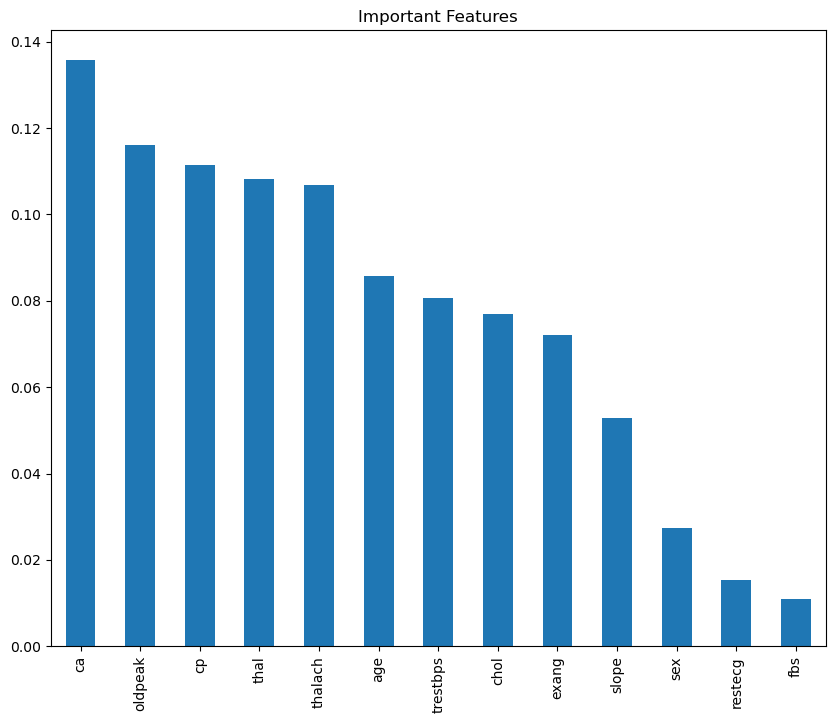

In [61]:
Imp_feature.plot(kind='bar',figsize=(10,8),title='Important Features')

# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [62]:
## Hyperparameter Tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV
cv = RandomizedSearchCV(rfc,param_distributions=parameters,refit=True,scoring='accuracy',verbose=3,cv=5)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.860 total time=   0.5s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.860 total time=   0.5s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.714 total time=   0.5s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.881 total time=   0.5s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.762 total time=   0.5s
[CV 1/5] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.3s
[CV 3/5] END max_depth=7, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.714 total time=   

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)

In [64]:
cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 8}

In [65]:
cv.best_score_

0.8254706533776301

# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [66]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50)

In [67]:
cv.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 8}

In [68]:
y_pred_tune = cv.predict(X_test)

# Tune Model Performance

In [69]:
print('Accuracy of tune model is',accuracy_score(y_test,y_pred_tune))
print('Precision of tune model is',precision_score(y_test,y_pred_tune))
print('recall of tune model is',recall_score(y_test,y_pred_tune))
print('f1_score of tune model is',f1_score(y_test,y_pred_tune))

Accuracy of tune model is 0.8131868131868132
Precision of tune model is 0.8367346938775511
recall of tune model is 0.82
f1_score of tune model is 0.8282828282828283


# Default Model Performance

In [71]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('recall is',recall_score(y_test,y_pred))
print('f1_score is',f1_score(y_test,y_pred))

Accuracy is 0.8241758241758241
Precision is 0.8269230769230769
recall is 0.86
f1_score is 0.8431372549019608


# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [74]:
## Best parameters in Tune model
best_param = cv.best_estimator_

In [75]:
best_param

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50)

In [76]:
imp_tuned = best_param.feature_importances_
imp_tuned = pd.Series(imp_tuned)
imp_tuned.index = best_param.feature_names_in_
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

ca          0.215556
cp          0.148227
thal        0.118739
oldpeak     0.106138
exang       0.085505
age         0.073575
thalach     0.069793
slope       0.051237
trestbps    0.043905
chol        0.039912
sex         0.029452
restecg     0.013016
fbs         0.004946
dtype: float64

In [77]:
imp_tuned[0:2]

ca    0.215556
cp    0.148227
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances for tuned model'}>

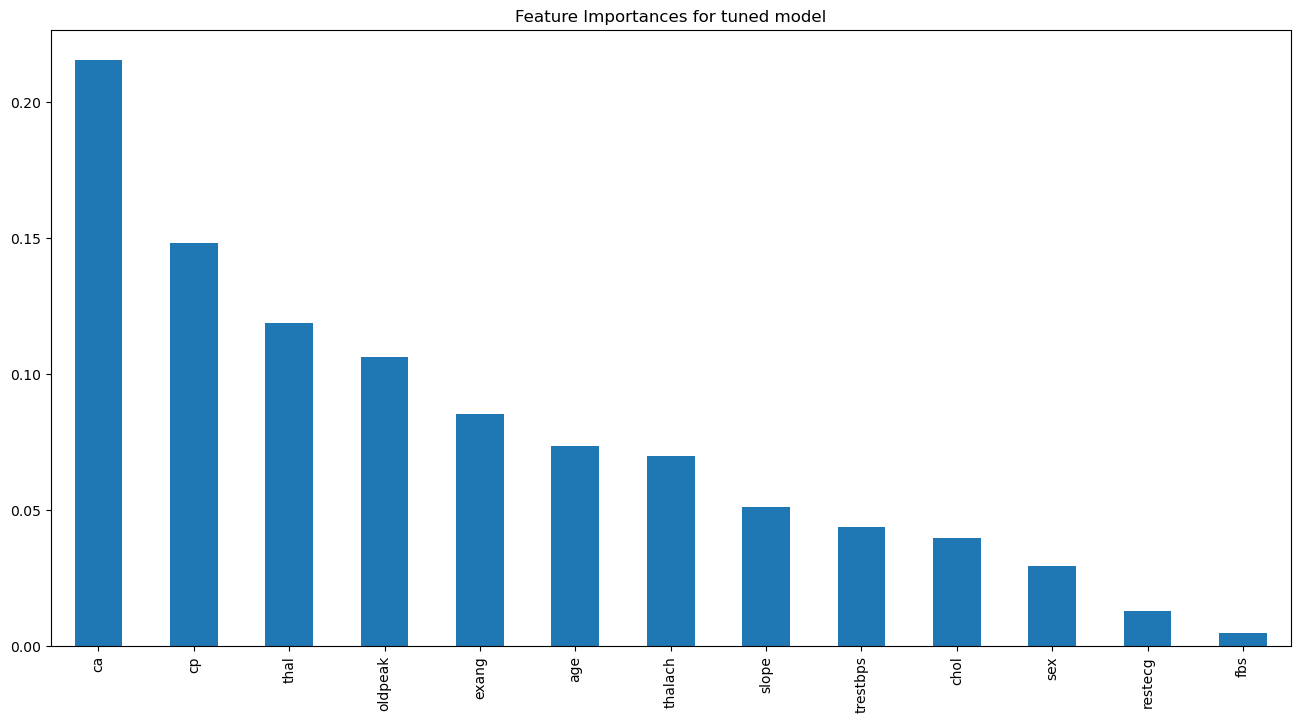

In [78]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [79]:
top2 = X_train[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [80]:
df_top2 =pd.concat([top2,y_train],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


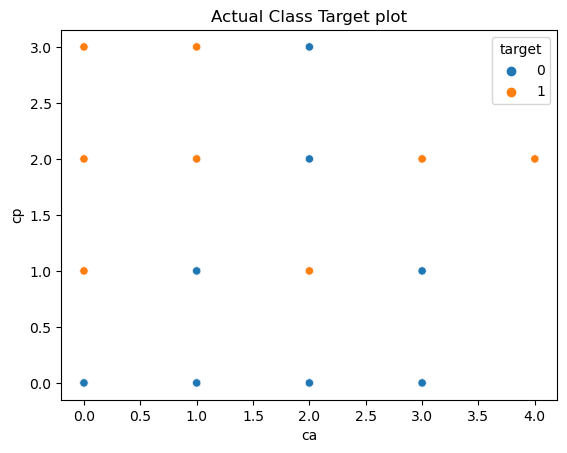

In [81]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [82]:
df_top2['predicted'] = best_param.predict(X_train)

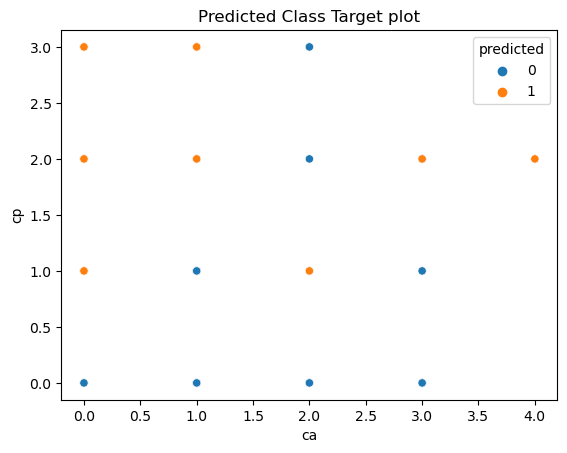

In [83]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()